In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

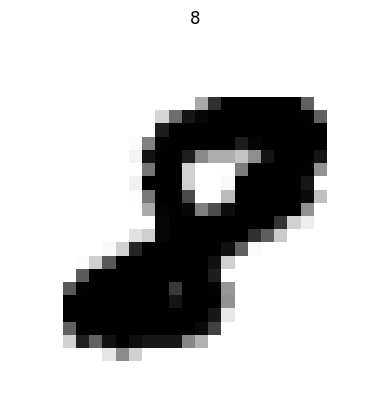

In [6]:
#displaying example
plt.imshow(X_train[34],cmap='binary',)
plt.title(y_train[34])
plt.axis(False)
plt.show()

In [7]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

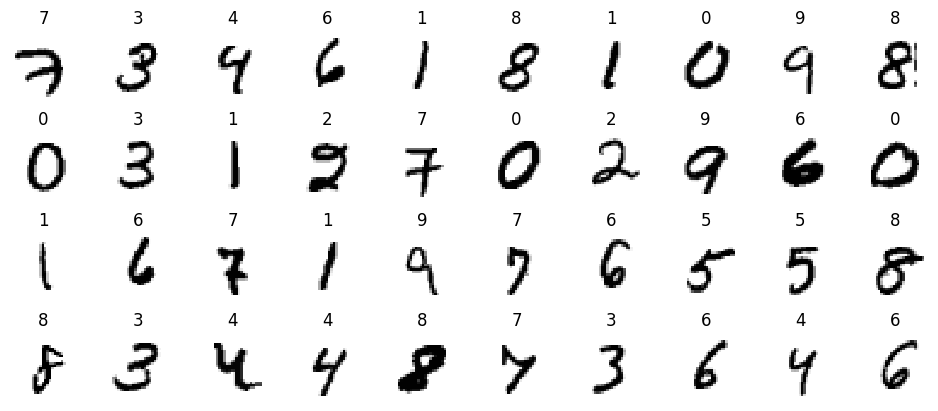

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [10]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates =  []
        self.losses =  []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [11]:
keras.backend.clear_session()
tf.random.set_seed(42)


In [12]:
tf.keras.backend.clear_session()

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [15]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 1.9064 - accuracy: 0.4402 - val_loss: 1.4282 - val_accuracy: 0.7080
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0741 - accuracy: 0.7734 - val_loss: 0.7995 - val_accuracy: 0.8220
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6925 - accuracy: 0.8346 - val_loss: 0.5826 - val_accuracy: 0.8606
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5470 - accuracy: 0.8606 - val_loss: 0.4835 - val_accuracy: 0.8790
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4737 - accuracy: 0.8743 - val_loss: 0.4281 - val_accuracy: 0.8904
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4294 - accuracy: 0.8823 - val_loss: 0.3928 - val_accuracy: 0.8950
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3994 - accuracy: 0.8896 - val_loss: 0.3677 - val_ac

In [16]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)    

313/313 [==============================] - 1s 3ms/step - loss: 0.1240 - accuracy: 0.9647


[0.12395842373371124, 0.9646999835968018]